In [18]:
library(dplyr)

In [15]:
phenomexcan <- readRDS('~/Downloads/gls-summary-phenomexcan.rds')
head(phenomexcan)

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
0,AB1_OTHER_VIRAL,Other viral diseases,LV736,0.004724582,0.5043394
1,AB1_OTHER_VIRAL,Other viral diseases,LV320,0.004847511,0.5082911
2,AB1_OTHER_VIRAL,Other viral diseases,LV366,0.005306150,0.5236914
3,AB1_OTHER_VIRAL,Other viral diseases,LV964,0.006105916,0.5481425
4,AB1_OTHER_VIRAL,Other viral diseases,LV92,0.006564807,0.5600481
5,AB1_OTHER_VIRAL,Other viral diseases,LV534,0.008796695,0.6097373


In [2]:
emerge <- readRDS(here::here('data/gls-summary-emerge.rds'))

In [14]:
phenomeXcan_DS_traits <- read.csv(here::here('data/phenomeXcan_DS_traits.csv'))
head(phenomeXcan_DS_traits)

,full_code,short_code,description,type,n,n_cases,n_controls,source,main_source,file_name,file_sha1,box_share_url,wget_command
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,20107_10-Illnesses_of_father_Alzheimers_diseasedementia,20107_10,Illnesses of father: Alzheimer's disease/dementia,binary,312666,15022,297644,UK Biobank,Rapid GWAS Project,spredixcan-20107_10.tar.bz2,15ecf3cc2cd5c29ab4169eca3c8b76fdc6561eeb,https://uchicago.box.com/shared/static/i4jqdjb0ywp1dberm6veneajz56khlnk.bz2,wget https://uchicago.box.com/shared/static/i4jqdjb0ywp1dberm6veneajz56khlnk.bz2 -O spredixcan-20107_10.tar.bz2
2,20110_10-Illnesses_of_mother_Alzheimers_diseasedementia,20110_10,Illnesses of mother: Alzheimer's disease/dementia,binary,331041,28507,302534,UK Biobank,Rapid GWAS Project,spredixcan-20110_10.tar.bz2,5267a8876b205687f966662d93ab4d1f45f47544,https://uchicago.box.com/shared/static/0sj21grh5m7lvwpufi4dbzpcqswfsjkt.bz2,wget https://uchicago.box.com/shared/static/0sj21grh5m7lvwpufi4dbzpcqswfsjkt.bz2 -O spredixcan-20110_10.tar.bz2
3,20111_10-Illnesses_of_siblings_Alzheimers_diseasedementia,20111_10,Illnesses of siblings: Alzheimer's disease/dementia,binary,279062,1609,277453,UK Biobank,Rapid GWAS Project,spredixcan-20111_10.tar.bz2,99ca7b2a74c0b265e67626468e604b4e6c06edf1,https://uchicago.box.com/shared/static/droarjlg7uckus0gv8rv7zpg2id8d8z4.bz2,wget https://uchicago.box.com/shared/static/droarjlg7uckus0gv8rv7zpg2id8d8z4.bz2 -O spredixcan-20111_10.tar.bz2
4,20112_10-Illnesses_of_adopted_father_Alzheimers_diseasedementia,20112_10,Illnesses of adopted father: Alzheimer's disease/dementia,binary,2562,146,2416,UK Biobank,Rapid GWAS Project,spredixcan-20112_10.tar.bz2,2a682e6bbcc20c195e99160919c144e9aaa93d63,https://uchicago.box.com/shared/static/mhh3mpua6knneqtvik4vjyztw3az3rdy.bz2,wget https://uchicago.box.com/shared/static/mhh3mpua6knneqtvik4vjyztw3az3rdy.bz2 -O spredixcan-20112_10.tar.bz2
5,20113_10-Illnesses_of_adopted_mother_Alzheimers_diseasedementia,20113_10,Illnesses of adopted mother: Alzheimer's disease/dementia,binary,2935,281,2654,UK Biobank,Rapid GWAS Project,spredixcan-20113_10.tar.bz2,78b1ef076a36290f03bdcb3bc142f4906df709cb,https://uchicago.box.com/shared/static/0lo21s7vpwt0rcevi6qgfcbgbe6fhl2y.bz2,wget https://uchicago.box.com/shared/static/0lo21s7vpwt0rcevi6qgfcbgbe6fhl2y.bz2 -O spredixcan-20113_10.tar.bz2
6,AD-Alzheimers_disease,AD,Alzheimer’s disease,categorical,361194,119,361075,UK Biobank,Rapid GWAS Project,spredixcan-AD.tar.bz2,12bca9b667f993b0bd3b1f7ef12f1d43cbaf4e42,https://uchicago.box.com/shared/static/uj3diew3vdi7tohhkg5mgzu2zjqz6dme.bz2,wget https://uchicago.box.com/shared/static/uj3diew3vdi7tohhkg5mgzu2zjqz6dme.bz2 -O spredixcan-AD.tar.bz2


In [4]:
head(emerge)

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
0,EUR_440.2,Atherosclerosis of the extremities,LV472,1.033637e-07,0.0006578871
1,EUR_440.2,Atherosclerosis of the extremities,LV182,3.710244e-07,0.0014323561
2,EUR_440.2,Atherosclerosis of the extremities,LV348,7.379936e-07,0.0025576761
3,EUR_440.2,Atherosclerosis of the extremities,LV504,1.534424e-06,0.0044997437
4,EUR_440.2,Atherosclerosis of the extremities,LV445,2.912525e-06,0.0074022553
5,EUR_440.2,Atherosclerosis of the extremities,LV535,4.016533e-06,0.0093509486


In [20]:
ds_phenomexcan <-  phenomexcan %>% 
                   dplyr::filter(phenotype %in% phenomeXcan_DS_traits$short_code) %>% 
                    dplyr::filter(fdr < 0.1)

head(ds_phenomexcan)

,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
11844,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV52,3.866972e-09,2.194222e-05
11845,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV19,4.998219e-06,9.257750e-03
11846,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV257,6.264476e-06,1.107963e-02
11847,6153_2,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Blood pressure medication",LV147,4.864166e-05,4.958498e-02
20727,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV83,4.067246e-09,2.280720e-05
20728,20002_1313,"Non-cancer illness code, self-reported: ankylosing spondylitis",LV769,5.677181e-08,2.320184e-04


In [8]:
first_10_lv_indices <- c(338, 310, 264, 92, 749, 671, 10, 898, 81, 928)
first_10_lv_indices <- paste0('LV', first_10_lv_indices)
first_10_lv_indices

[1] "LV338" "LV310" "LV264" "LV92"  "LV749" "LV671" "LV10"  "LV898" "LV81" 
[10] "LV928"

In [17]:
library(dplyr)

phenomexcan_draft <- function(lv_lb){

    phenomexcan %>% 
    dplyr::filter(lv==lv_lb) %>% 
    dplyr::arrange(fdr) %>% 
    dplyr::filter(fdr < 0.05)
    
}

lapply(first_10_lv_indices, phenomexcan_draft)    


[[1]]
[1] phenotype      phenotype_desc lv             pvalue         fdr           
<0 rows> (or 0-length row.names)

[[2]]
        phenotype                              phenotype_desc    lv
1268295   20096_1 Size of red wine glass drunk: small (125ml) LV310
              pvalue         fdr
1268295 1.727802e-06 0.004014124

[[3]]
                                                     phenotype
2818872                                              30100_raw
152985                                               30110_raw
1935507                                              30290_raw
3312374                                              30250_raw
3496943                                              30240_raw
4003274 Astle_et_al_2016_High_light_scatter_reticulocyte_count
3974651                                              30280_raw
2940276                                              30300_raw
4005249                    Astle_et_al_2016_Reticulocyte_count
1269282                                                 102460
3221571                                              30080_raw
3456480                                              30260_raw
1897014                                                20107_8
                                    phenotype_desc    lv       pvalue
2818872         Mean platelet (thrombocyte) volume LV264 2.092969e-17
152985                 Platelet distribution width LV264 9.022492e-16
1935507 High light scatter reticulocyte percentage LV264 2.126776e-14
3312374                         Reticulocyte count LV264 2.079380e-13
3496943                    Reticulocyte percentage LV264 5.061031e-13
4003274      High Light Scatter Reticulocyte Count LV264 1.106786e-10
3974651             Immature reticulocyte fraction LV264 7.033333e-10
2940276      High light scatter reticulocyte count LV264 1.454457e-07
4005249                         Reticulocyte Count LV264 1.414876e-06
1269282                               Crisp intake LV264 4.519613e-06
3221571                             Platelet count LV264 6.616795e-06
3456480                   Mean reticulocyte volume LV264 1.071547e-05
1897014   Illnesses of father: High blood pressure LV264 4.014298e-05
                 fdr
2818872 8.285319e-13
152985  2.365660e-11
1935507 4.315344e-10
3312374 3.241759e-09
3496943 7.046730e-09
4003274 9.028279e-07
3974651 4.781029e-06
2940276 5.224941e-04
4005249 3.431237e-03
1269282 8.575833e-03
3221571 1.155098e-02
3456480 1.662840e-02
1897014 4.346742e-02

[[4]]
        phenotype                                                phenotype_desc
443163       2724                                                 Had menopause
2364860  3581_raw                      Age at menopause (last menstrual period)
879417     2877_1    Type of tobacco previously smoked: Manufactured cigarettes
1338372     20425 Ever worried more than most people would in similar situation
          lv       pvalue          fdr
443163  LV92 1.354986e-08 6.575946e-05
2364860 LV92 1.582005e-05 2.221859e-02
879417  LV92 2.099489e-05 2.724720e-02
1338372 LV92 4.059392e-05 4.379130e-02

[[5]]
       phenotype                                        phenotype_desc    lv
206283       N64 Diagnoses - main ICD10: N64 Other disorders of breast LV749
269461 30010_raw                    Red blood cell (erythrocyte) count LV749
             pvalue        fdr
206283 8.582016e-06 0.01406986
269461 3.900927e-05 0.04255741

[[6]]
                phenotype
3757510          5133_raw
24676            5132_raw
1129129          5134_raw
2062831          5257_raw
3773302          5135_raw
172726           5098_raw
2582980          5097_raw
1881223          5096_raw
3787120          5099_raw
3567020          5256_raw
2856380          5265_raw
3003446            6159_1
279321          23109_raw
2835652        20002_1265
192465                N73
524105           5264_raw
3762444 M13_ARTHROSIS_OTH
587271           5255_raw
1365021         23106_raw
44416      KNEE_ARTHROSIS
3962806               M1

In [ ]:
(338, 967, 875, 149, 439, 52)

In [27]:
head(data)

,phenotype,phenotype_desc,lv,pvalue,fdr,log_fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
2952124,30190_raw,Monocyte percentage,LV898,6.474868e-08,0.000259884,3.585220
1979930,3786_raw,Age asthma diagnosed,LV898,5.194240e-07,0.001501316,2.823528
4006240,Astle_et_al_2016_Monocyte_count,Monocyte Count,LV898,1.143575e-06,0.002876976,2.541064
2340189,30130_raw,Monocyte count,LV898,7.685060e-06,0.012908015,1.889141


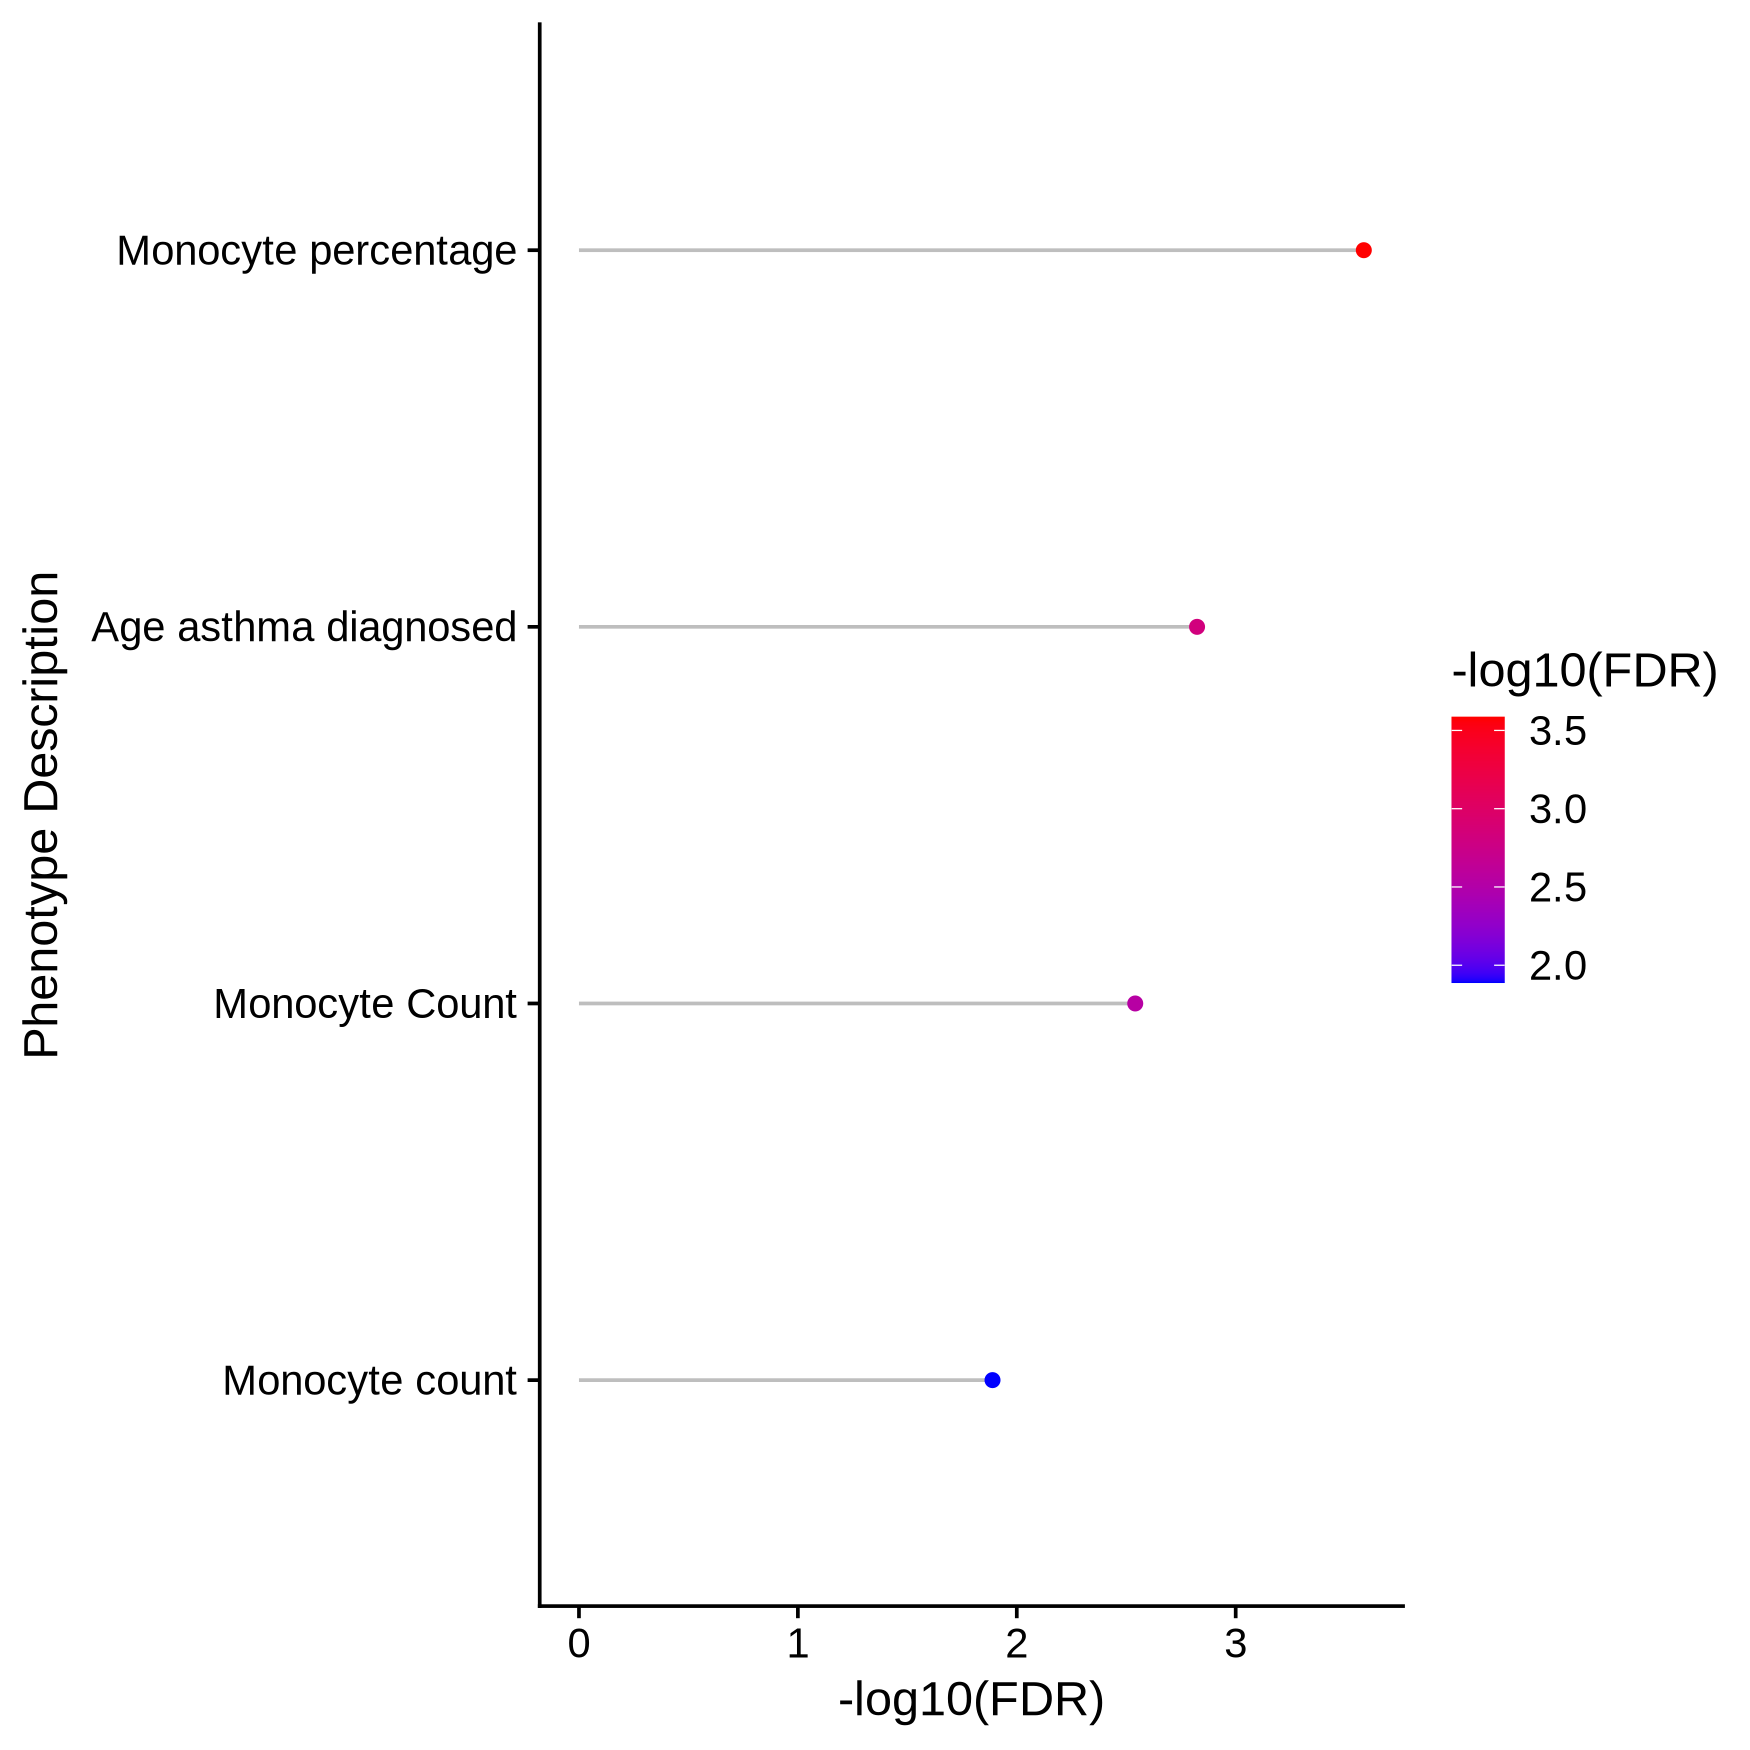

In [37]:
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 250)

library(ggplot2)
library(dplyr)
library(forcats)
library(cowplot)

data <- phenomexcan_draft('LV898')   

data <- data %>%
  mutate(log_fdr = -log10(fdr),
         phenotype_desc = fct_reorder(phenotype_desc, log_fdr))

# Plotting
ggplot(data, aes(x = log_fdr, y = phenotype_desc)) +
  geom_segment(aes(x = 0, xend = log_fdr, y = phenotype_desc, yend = phenotype_desc), color = "gray") +
  geom_point(aes(color = log_fdr)) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(x = "-log10(FDR)",
       y = "Phenotype Description",
       size = "Number of Genes",
       color = "-log10(FDR)") +
theme_cowplot() +
  theme(axis.text.y = element_text(angle = 0, hjust = 1))


In [15]:
head(emerge)
library(dplyr)

emerge_draft <- function(lv_lb){

    emerge %>% 
    dplyr::filter(lv==lv_lb) %>% 
    dplyr::arrange(pvalue) %>% 
    dplyr::filter(pvalue < 0.05)
    
}

emerge_draft('LV898')

lapply(first_10_lv_indices, emerge_draft)    


,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
0,EUR_440.2,Atherosclerosis of the extremities,LV472,1.033637e-07,0.0006578871
1,EUR_440.2,Atherosclerosis of the extremities,LV182,3.710244e-07,0.0014323561
2,EUR_440.2,Atherosclerosis of the extremities,LV348,7.379936e-07,0.0025576761
3,EUR_440.2,Atherosclerosis of the extremities,LV504,1.534424e-06,0.0044997437
4,EUR_440.2,Atherosclerosis of the extremities,LV445,2.912525e-06,0.0074022553
5,EUR_440.2,Atherosclerosis of the extremities,LV535,4.016533e-06,0.0093509486


,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
76011,EUR_426.32,Left bundle branch block,LV898,0.007240815,0.5973291
127351,EUR_425.2,Secondary/extrinsic cardiomyopathies,LV898,0.025927383,0.7933157
104665,EUR_513,Respiratory abnormalities,LV898,0.038189943,0.8536996
200421,EUR_292.4,Altered mental status,LV898,0.043145723,0.8733421


,phenotype,phenotype_desc,lv,pvalue,fdr
,<fct>,<fct>,<fct>,<dbl>,<dbl>
250698,EUR_707.1,Decubitus ulcer,LV338,0.0007343447,0.2621250
126344,EUR_394,Rheumatic disease of the heart valves,LV338,0.0020534874,0.4003297
288228,EUR_244,Hypothyroidism,LV338,0.0206664745,0.7535776
56289,EUR_081,Infection/inflammation of internal prosthetic device; implant; and graft,LV338,0.0271753983,0.8003123
225065,EUR_244.4,Hypothyroidism NOS,LV338,0.0282184755,0.8063436
157959,EUR_285.2,Anemia of chronic disease,LV338,0.0295979886,0.8150804
59278,EUR_366.2,Senile cataract,LV338,0.0399586693,0.8602321
107642,EUR_275.5,Disorders of calcium/phosphorus metabolism,LV338,0.0437269998,0.8765516
,phenotype,phenotype_desc,lv,pvalue,fdr
